***

# KNN 

***



#### What is it? 
> K-nearest neighbors (KNN) is supervised machine learning algorithm that can be used to solve both regression and classification tasks. 
    



#### How does it work?

> Lets say we have a dataset with three groups or classes of points - label 1, label 2, and label 3. After introducing a new point to the dataset, we want to determine which class the point could belong to. To determine the class of the new data point, KNN will calculate the distance between the new point and all other existing points in the dataset. K points closest to the new data point are then chosen, and the most common label/class among those k chosen points will be the class of the new data point. This process is repeated to classify data points.

> KNN can be simplified into three steps:
    
        1. Calculate distance
        2. Find k closest neighbors
        3. Majority vote for labels

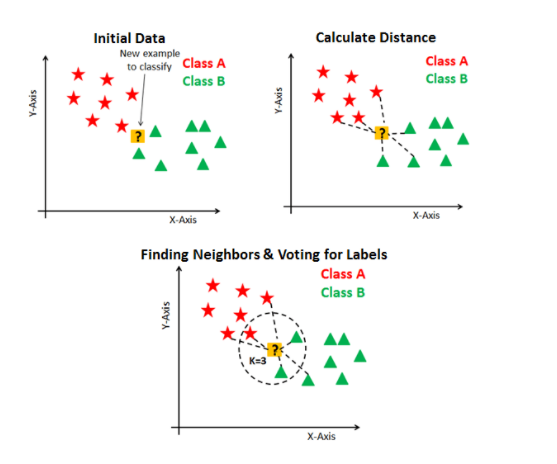

> There are a few different ways distance can be calculated. These are:
    
        - The Manhattan distance
    
    
 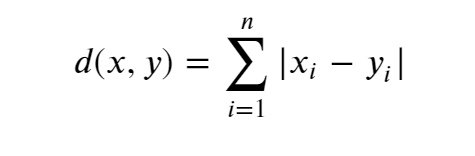
    
    
    

        - Euclidean Distance
    
    
   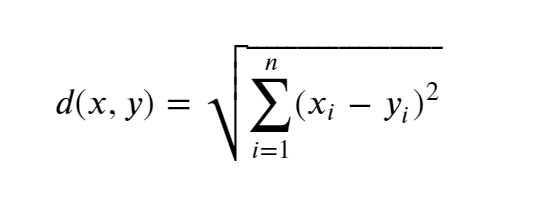

        - Minkowski distance 
    
            Both the Euclidean and Manhattan distances are special cases of the Minkowski distance, where c = 2 gives you the Euclidean distance and c= 1 gives you the Manhattan distance.
    
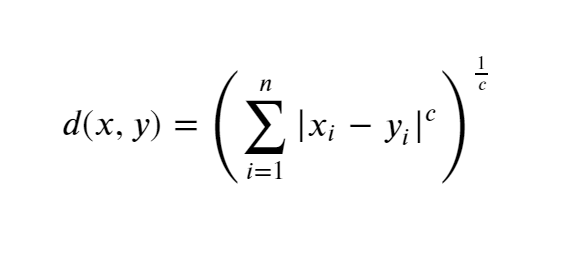




#### Pros and Cons

>Pros

        - No assumptions to be met
        - KNN is simple and intuitive
        - Can be used for both regression and classification
>Cons

        - Algorithm speed declines very fast as dataset grows
        - Curse of dimensionality: Struggles to predict as the number of variables increase
        - Imbalanced data can cause issues with classifying data points
        - Sensitive to outliers
        


### Model Implementation

> Below is an implementation of the KNN model on a dataset. 





#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    
[Plotly](https://plotly.com/python/)

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Numpy](https://numpy.org/)

[Scikit Learn Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[Scikit Learn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix)

[Collections Counter()](https://docs.python.org/3/library/collections.html)

[Pandas](https://pandas.pydata.org/)

[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)

[Matplotlib](https://matplotlib.org/)

[Seaborn](https://seaborn.pydata.org/)

In [1]:
#import libraries

import plotly.express as px

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from collections import Counter

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. Only two species will be used in the final dataset, so the first 276 rows will be selected from the dataframe (as seen below). For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#import palmer penguins data
from palmerpenguins import load_penguins

#load palmer penguins data
penguins = load_penguins()

#select rows with first two species only, adelie and gentoo
penguins = penguins.iloc[:276]

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 265 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
260,270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009
261,272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
262,273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
263,274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> The data is then split into an array containing features and an array containing the responses/labels. Bill depth, body mass, and flipper length are selected as features, while the response is species (Adelie or Gentoo).

In [4]:
#features
X = df[["bill_depth_mm", "body_mass_g", "flipper_length_mm"]].to_numpy()

#response/labels
y = df["species"].to_numpy()

#### Visualizing the data:

> With the data now mostly prepped, we can visualize the features and response on a 3D scatter plot. Below, penguin features are plotted and colored by species type. We can see that there is a clear separation of the data points within each class/species.

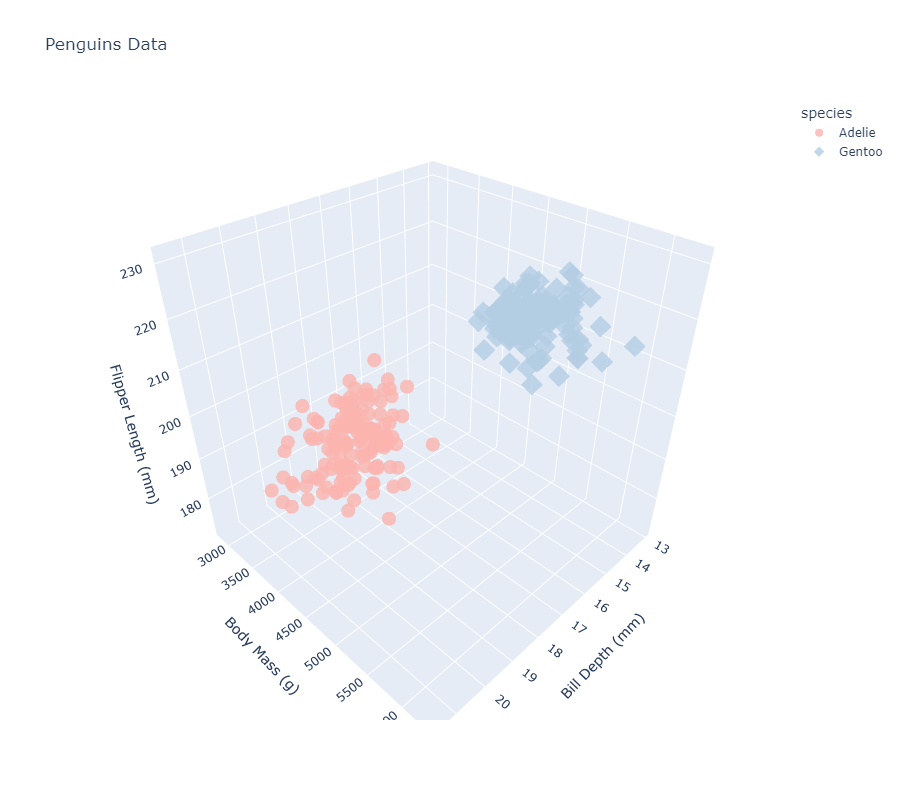

In [5]:
#Interactive 3d scatter plot

fig = px.scatter_3d(df, x ="bill_depth_mm", 
                    y ="body_mass_g", 
                    z ="flipper_length_mm",
                    color = 'species',
                    symbol = "species",
                    labels={
                     "bill_depth_mm": "Bill Depth (mm)",
                     "body_mass_g": "Body Mass (g)",
                     "flipper_length_mm": "Flipper Length (mm)"},
                    title = "Penguins Data",
                    color_discrete_sequence=px.colors.qualitative.Pastel1,
                    opacity = .8)


#run this to interact with 3d plot
#fig.show() 


fig.show("png", width=900, height=800) #this was necessary to show plot output in github

> Next, the data is then divided into train and test sets. The KNN model will first be trained with the data in the training sets and then tested with the data in the test sets. Below, 75% of the data will be used to train the model, while 25% of the data will be used to test the model.

In [6]:
#data is split into test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=1234)

#### Model Building Steps

> With data preparation now complete, model building can now begin. Here are the steps:
    
    1. Calculate the distance between points in X_test and each row in X_train
    2. Sort the distances in ascending order
    3. Keep the distances of the k smallest points and retrieve the label
    4. Find the most common label and assign that label to the data point

#### Model Building

> Below the model is built using a class. The steps outlined above are clearly commented in the code below. 

In [7]:
#functions for both manhattan and euclidean distance
#will be able to select which distance to use when implementing 
#model with data set

def euclideanDistance(p, q):
    return np.sqrt(np.sum((p-q)**2))

def manhattanDistance(p, q):
    return np.sum(abs((p-q)))

In [8]:
class KNN:
    
    #sets k to a default value, euclidean distance used by default
    def __init__(self, k = 7, manhattan = False): 
        self.k = k
        self.Man = manhattan
        
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def labelPrediction(self, X_test): #pass in X
        label_Prediction = [self.predict(i) for i in X_test]
        return np.array(label_Prediction)
    

    def predict(self, X_test):
        
        #Step1:
        # Compute distances between x and all examples in the training set
        if self.Man == True:
            distances = [manhattanDistance(X_test, x_train) for x_train in self.X_train]
        else:
            distances = [euclideanDistance(X_test, x_train) for x_train in self.X_train]
            
        #Step 2
        # Sort by distance then return indices of the first *k* neighbors
        k_indices = np.argsort(distances)[: self.k]
        
        #Step 3
        # Extract the labels from y_train usings indices found previously
        labels = [self.y_train[i] for i in k_indices]
        
        #Step 4
        # Using counter and, most_common, return the most common class label/majority vote.
        mostCommon = Counter(labels).most_common(1)
        
        return mostCommon[0][0]

#### Using Model on Prepared Data

> Below, the model is trained by passing X_train and y_train to model.fit() with K set as 7. Afterwards, predictions are made by passing X_test to model.labelPrediction().

In [9]:
k = 7 #class default

model = KNN(k = k, manhattan = True)

model.fit(X_train, y_train)

predictions = model.labelPrediction(X_test)

#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> Accuracy: Shows us a fraction of the correct predictions. 
        
        - TP + TN / TP + TN + FP + FN
        - Number of correct predictions/ total number of predictions
        
> Precision: Precision tell us how many of the values the model predicted to be in a certain class actually belong to that class. 

        - TP/ TP +FP

> Recall: Recall is the measure of how many positive cases the classifier correctly classified over all the positive cases in the data. Recall is used to select the best model when there is a high cost associated with false negative. 

        - TP / TP + FN
        
>F1 Score: The F1 score is a function of recall and precision. F1 score is important when you want to seek balance between recall and precision

        - 2 * (Precision * Recall / Precision + Recall)

> With K set to 7, the model has a decent accuracy score at 0.91. Therefore, the model is 91% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 0.95 and 0.86 respectively.

In [10]:
#classification report
print(classification_report(y_test, predictions))

#accuracy
np.sum(y_test == predictions) / len(y_test)

# print(Counter(y_test))
# Counter(predictions)

              precision    recall  f1-score   support

      Adelie       0.95      0.90      0.92        41
      Gentoo       0.86      0.92      0.89        26

    accuracy                           0.91        67
   macro avg       0.90      0.91      0.91        67
weighted avg       0.91      0.91      0.91        67



0.9104477611940298

> Below, is a confusion matrix. A confusion matrix is a two-dimensional table that allows us to visualize the correctly labeled and incorrectly labeled instances by a classifier. The confusion matrix below tells us the following:

        - There are 41 observations labeled Adelie and 26 observations labeled Gentoo
        - The model predicted that there are 39 observations labeled Adelie and 28 labeled Gentoo
        - There are 37 observations correctly classifed as Adelie (True Positive)
        - There are 4 observations incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 24 observations correctly classified as Gentoo (True Negative)
        - There are 2 observations incorrectly classified as Adelie, when it should be Gentoo (False Positive)

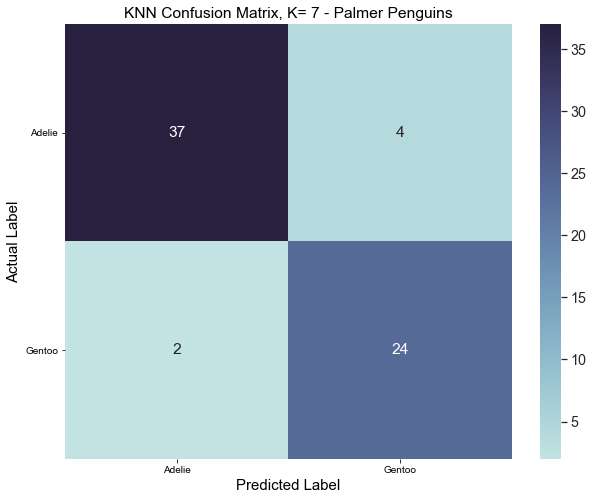

In [11]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

matrix_df = pd.DataFrame(cm)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("KNN Confusion Matrix, K= 7 - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

#### Choosing Optimal K

> Below is a graph that plots accuracy against values of k. Based on the graph, it seems that choosing a k at around 5 (where the graph is slightly stable) will produce a model with a higher accuracy than 91%. 

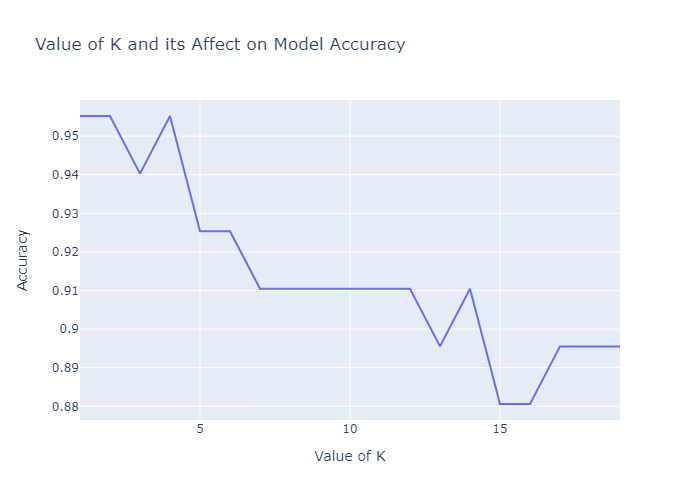

In [12]:
# try K=1 through K=30 and record testing accuracy
k_range = range(1, 20)
scores = []

for k in k_range:
    f = KNN(k = k)
    f.fit(X_train, y_train)
    predictions = f.labelPrediction(X_test)
    scores.append(np.sum(y_test == predictions) / len(y_test))

#create dataframe with ks and accuracy scores
scores_data = {"Value of K" : k_range, "Accuracy" : scores}
new_df = pd.DataFrame(scores_data)
new_df
    
#plot
fig = px.line(new_df , x = "Value of K" , y = "Accuracy" , 
              title='Value of K and its Affect on Model Accuracy')


#fig.show() #run this to get interactive plot

fig.show("png") #run this to get .png of plot. necessary for github

> We can also find the best k value by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), a function from ScikitLearn that allows us to easily check multiple values for k. Below, a GridSearchCV object is created.  GridSearchCV suggests that 7 is the optimal value of k.

In [13]:
#cross validation to find optimal k
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
                      param_grid = {'n_neighbors': np.arange(1,20)})

knn_grid.fit(X_train, y_train)

knn_grid.best_params_

{'n_neighbors': 7}

### Applying Optimal K to Model

> Based on the graph above, it was decided that setting k to 5 will increase model accuracy. Below, the model is trained again by passing X_train and y_train to model.fit() with K set as 5 this time. Afterwards, predictions are made by passing X_test to model.labelPrediction().

In [14]:
k = 5

#create model with new value of k
model = KNN(k = k, manhattan = True)

#train model
model.fit(X_train, y_train)

#newy predictions
predictions = model.labelPrediction(X_test)


#### Model evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting this time with K set as 5. 

> With K set to 5, the model has a decent accuracy score at around 0.925. Therefore, this time the model is about 93% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 0.97 and 0.86 respectively.

In [15]:
print(classification_report(y_test, predictions))

#accuracy
np.sum(y_test == predictions) / len(y_test)

# print(Counter(y_test))
# Counter(predictions)

              precision    recall  f1-score   support

      Adelie       0.97      0.90      0.94        41
      Gentoo       0.86      0.96      0.91        26

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.93      0.93      0.93        67



0.9253731343283582

> Below, is another confusion matrix. The confusion matrix below tells us the following:

        - There are 41 observations labeled Adelie and 26 observations labeled Gentoo
        - The model predicted that there are 39 observations labeled Adelie and 28 labeled Gentoo
        - There are 37 observations correctly classifed as Adelie (True Positive)
        - There are 4 observations incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 25 observations correctly classified as Gentoo (True Negative)
        - There is 1 observation incorrectly classified as Adelie, when it should be Gentoo (False Positive)

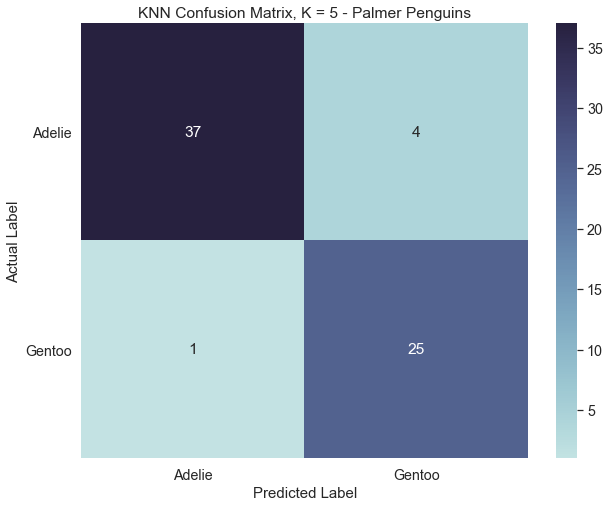

In [16]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

matrix_df = pd.DataFrame(cm)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("KNN Confusion Matrix, K = 5 - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

> Based on the confusion matrix and classification report above, we can see that setting K to a more optimal value produced a better classifier. Overall, the classifier with K set as 5 had higher values for precision, accuracy, f1-score and recall than the classifier with K set as 7.

***
### Model Implementation Using Scikit

> KNN can also be implemented using Scikit Learn. Below, I show how this can be done.

***

#### Libraries Used

> KNeighborsClassifier from Scikit Learn

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [17]:
#import kneighborsClassifier

from sklearn.neighbors import KNeighborsClassifier


#### Model Build
> Below, the model is built using the KNeighborsClassifier(). K is set to 5, and p is set to 1 for the Manhattan distance. The model is then trained by passing X_train and y_train to classifier.fit(). Afterwards, predictions are made by passing X_test to classifier.predict().

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 5, p=1)

#fitting the model
classifier.fit(X_train, y_train)

#predicts labels
pred = classifier.predict(X_test)

#### Model Evaluation

> As seen below, this classifier built with Scikit Learn produces the same results as the classifier that was built from scratch. The model classification report and confusion matrix are seen below.

In [19]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

      Adelie       0.97      0.90      0.94        41
      Gentoo       0.86      0.96      0.91        26

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.93      0.93      0.93        67



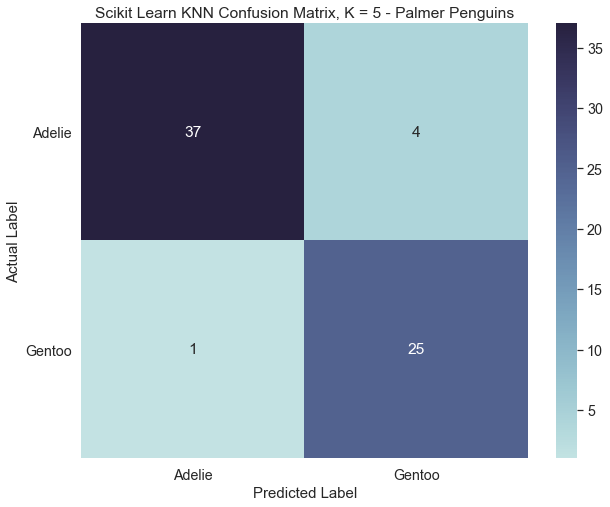

In [20]:
#confusion matrix
cm = confusion_matrix(y_test, pred)

matrix_df = pd.DataFrame(cm)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Scikit Learn KNN Confusion Matrix, K = 5 - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

#### Conclusion

> Overall, the KNN model was fairly decent at classifying data points from the Palmer Penguins test dataset with an accuracy of 93%.